In [1]:
import os
import pickle
import pandas as pd
from tqdm.notebook import tqdm
from functions import readSet, corrMatrix, saveSet
tqdm.pandas()

In [2]:
#dataset = 'AirlineTweets'
#dataset = 'Sentiment140'
dataset = 'IMDB'
inputFile = f'./data/{dataset}/Dimensions.csv'
postags = readSet('./wordlists/postags.txt')
dimensions = pickle.load(open('./data/Dimensions-All.pickle', mode='rb'))
dimensions.keys()

dict_keys(['base', 'postag', 'postagwords', 'lexical', 'syntactic', 'semantic', 'sentiment', 'formulas'])

In [3]:
df = pd.read_csv(inputFile)

# Base

<AxesSubplot:>

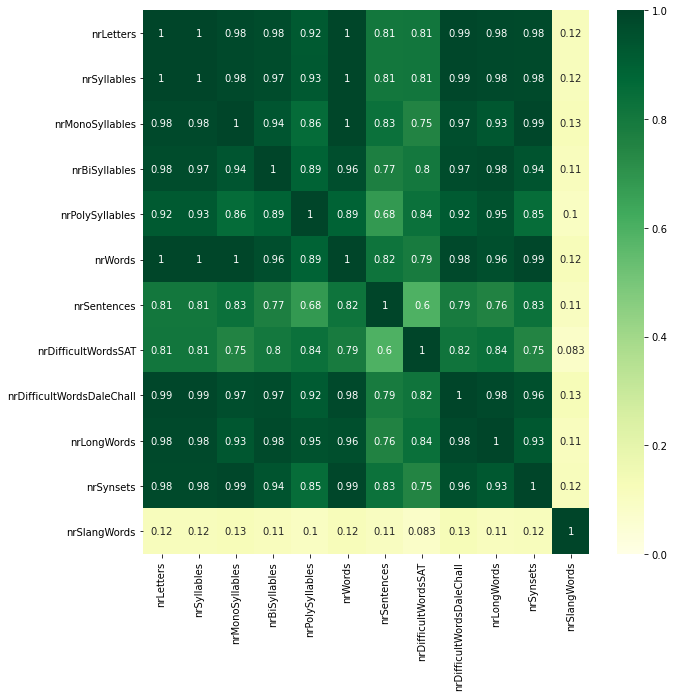

In [4]:
corrMatrix(df[dimensions['base']])

<AxesSubplot:>

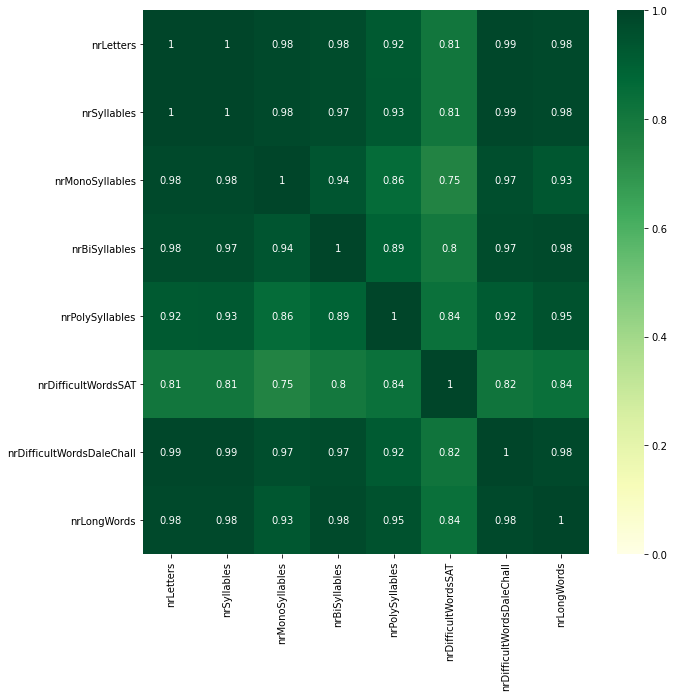

In [17]:
baseGroup = [x for x in dimensions['base'] if x not in ['nrWords', 'nrSentences', 'nrSlangWords', 'nrSynsets']]
corrMatrix(df[baseGroup])

# Lexical

<AxesSubplot:>

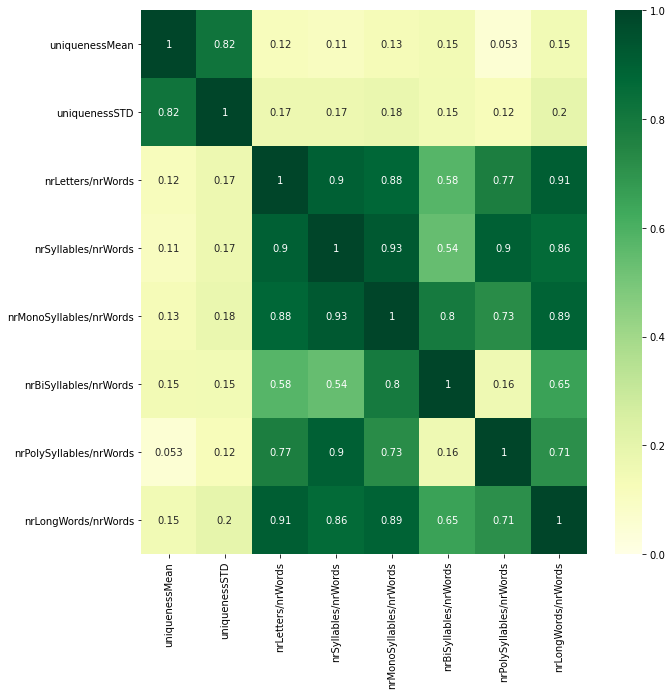

In [7]:
corrMatrix(df[dimensions['lexical']])

<AxesSubplot:>

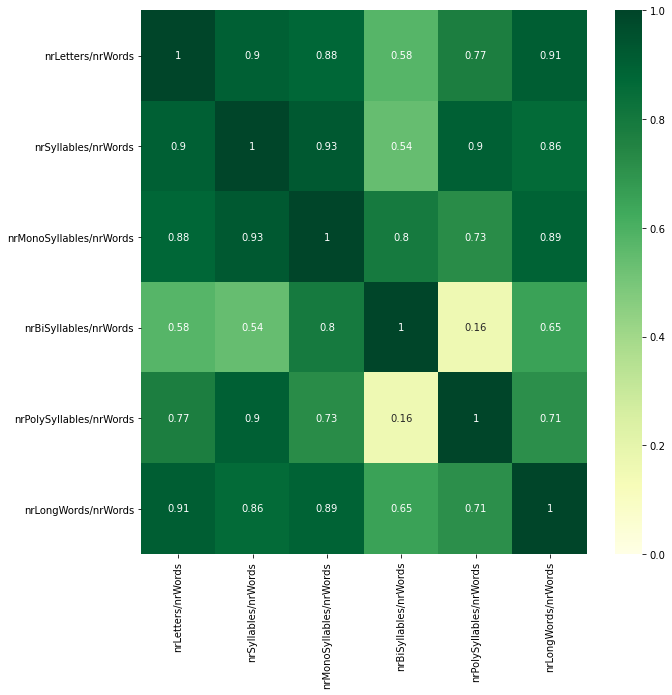

In [8]:
lexical = ['uniquenessMean', 'uniquenessSTD']
lexicalGroup = [x for x in dimensions['lexical'] if x not in lexical]
corrMatrix(df[lexicalGroup])

# Syntactic

<AxesSubplot:>

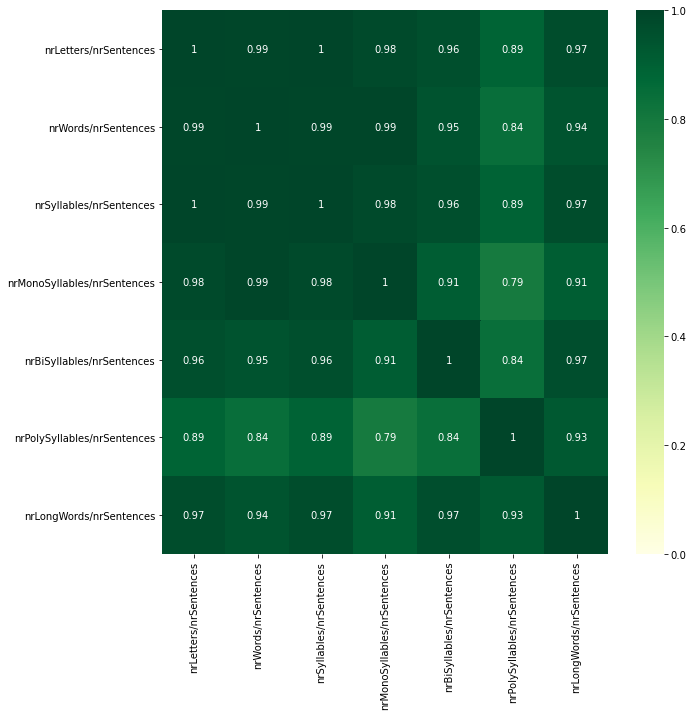

In [9]:
syntacticGroup = dimensions['syntactic']
corrMatrix(df[syntacticGroup])

# POSTags

<AxesSubplot:>

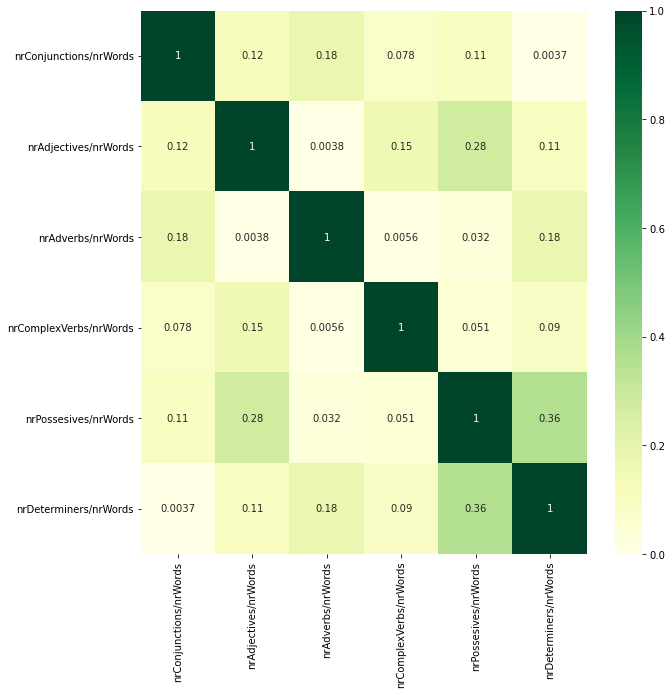

In [10]:
postagwords = dimensions['postagwords']
corrMatrix(df[postagwords])

# Semantic

<AxesSubplot:>

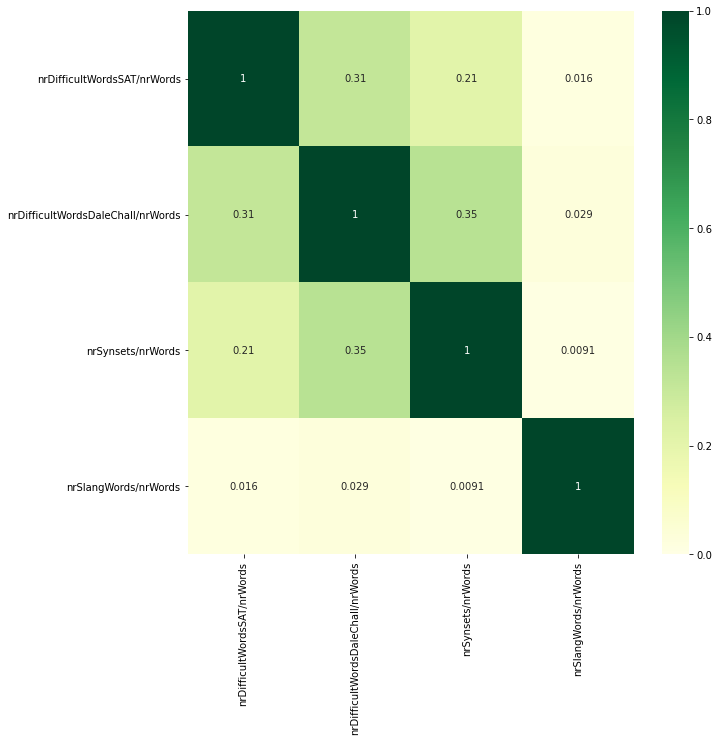

In [11]:
semantic = dimensions['semantic']
corrMatrix(df[semantic])

# Sentiment

<AxesSubplot:>

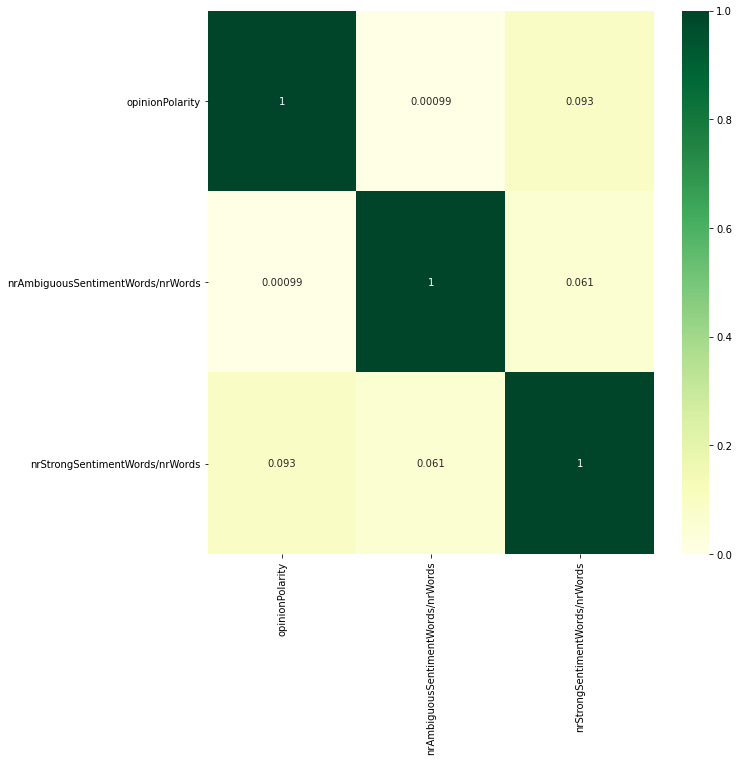

In [12]:
sentiment = [x for x in dimensions['sentiment'] if x not in ['nrAmbiguousSentimentWords', 'nrStrongSentimentWords']]
corrMatrix(df[sentiment])

In [13]:
dimensions.keys()

dict_keys(['base', 'postag', 'postagwords', 'lexical', 'syntactic', 'semantic', 'sentiment', 'formulas'])

In [15]:
picked = postagwords + lexical + semantic + sentiment
groups = {
    'base': baseGroup,
    'lexical': lexicalGroup,
    'syntactic': syntacticGroup
}
saveSet('./data/Dimensions-Picked-Base.txt', picked)
pickle.dump(groups, open('./data/Dimensions-Correlated-Groups.pickle', 'wb'))

<AxesSubplot:>

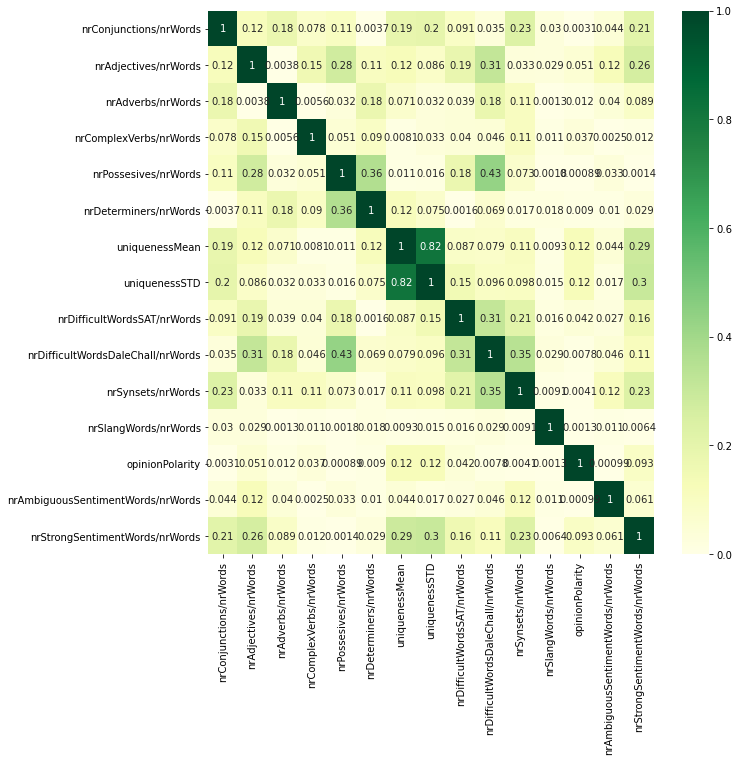

In [19]:
corrMatrix(df[picked])

In [ ]:
print(picked)

['nrSlangWords', 'nrConjunctions/nrWords', 'nrAdjectives/nrWords', 'nrAdverbs/nrWords', 'nrComplexVerbs/nrWords', 'nrPossesives/nrWords', 'nrDeterminers/nrWords', 'uniquenessMean', 'uniquenessSTD', 'nrDifficultWordsSAT/nrWords', 'nrDifficultWordsDaleChall/nrWords', 'nrSynsets/nrWords', 'nrSlangWords/nrWords', 'opinionPolarity', 'nrAmbiguousSentimentWords/nrWords', 'nrStrongSentimentWords/nrWords']
